## MLP，简洁实现

In [4]:
import torch
from torch import nn
import sys
sys.path.append('..')
import utils
import d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, '../data', 4)

### 1.模型

与softmax回归的简洁实现（ 3.7节）相比， 唯一的区别是我们添加了2个全连接层（之前我们只添加了1个全连接层）。 第一层是隐藏层，它包含256个隐藏单元，并使用了ReLU激活函数。 第二层是输出层。

In [6]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

### 2.训练

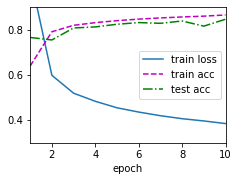

In [8]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 3.小结

对于相同的分类问题，多层感知机的实现与softmax回归的实现相同，只是多层感知机的实现里增加了带有激活函数的隐藏层。